In [1]:
import math
from scipy.constants import Planck, pi, alpha, m_p, m_n, e
from mpmath import mp

In [2]:
#spin angular momentum
n = 2    #number of nucleons
l = 1/2
s = 1/2
def SAM(n, l, s):
    L = 0    #Orbital angular momenta of all the nucleons
    S = 0    #Spin angular momenta of all the nucleons
    j = 1
    for i in range(n):
        o=l*j
        p=s*j
        L+=o
        S+=p
    SAM = L + S
    return(SAM)
SAM(n, l, s)

2.0

In [3]:
#Magnitude
h = Planck/(2*pi)
I = 1/2    #aka nuclear spin, can also be 0, 1/2, 3/2, 1
M = (math.sqrt(I*(I+1)))*h
print(M)

9.13285984196702e-35


In [4]:
#Spin factor
sa = 1/2
sb = 1/2
s = (sa+sb)/2
l = 1/2
J = SAM(2, l, s)
g = ((2*J)+1)/(((2*sa)+1)*((2*sb)+1))
print(g)

1.25


In [5]:
#Differential Scattering cross sections for proton to proton scattering
r = 20    #radial distance
ang = 45    #scattering angle
delta_k = 10    #change in wavevector due to scattering
X = m_p    #reduced mass of a and b
v = 10000    #incoming velocity
E = 10000    #Energy before reaction
s = 1/2    #spin

def differential_cross(r, ang, delta_k, X, v, s):
    V_r = (-1*alpha)/r    #total interaction potential
    Born = (((2*ang)/h**2)*(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*100000000000000000000000000000000000000)-(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*0))))**2
    #Yes I approximated infinity and no I am not an engineer
    if Born < 0:
        Born *= -1
    print('Born Scattering cross section',Born)
    A = 2*(s-0)
    Mott = (alpha/(4*E))*((mp.csc(X/2))**4+(mp.sec(X/2))**4+(A*math.cos((alpha/(h*v))*math.log(math.tan(X/2)**2)/((mp.sin(X/2)**2)*(mp.cos(X/2)**2)))))**2
    print('Mott Scattering cross section',Mott)
    Rutherford = ((alpha/4*E)**2)*(mp.csc(X/2)**4)
    print('Rutherford Scattering cross section', Rutherford)
differential_cross(r, ang, delta_k, X, v, s)

Born Scattering cross section 2.6597159996191997e+209
Mott Scattering cross section 7.62365130299246e+209
Rutherford Scattering cross section 6.80361170012071e+110


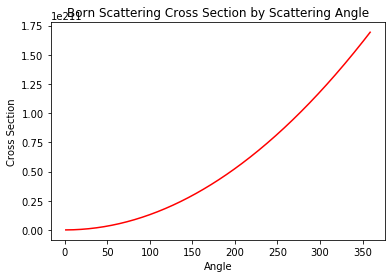

In [6]:
import matplotlib.pyplot as plt

sol = []
nums = []
r = 20    #radial distance
delta_k = 10    #change in wavevector due to scattering
X = m_p    #reduced mass of a and b
v = 10000    #incoming velocity
E = 10000    #Energy before reaction
V_r = (-1*alpha)/r    #total interaction potential
ang = 1
for i in range(359):
    Born = (((2*ang)/h**2)*(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*100000000000000000000000000000000000000)-(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*0))))**2
    sol.append(Born)
    nums.append(ang)
    ang+=1
plt.title('Born Scattering Cross Section by Scattering Angle') 
plt.ylabel('Cross Section') 
plt.xlabel('Angle') 
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(nums,sol, color = 'red')

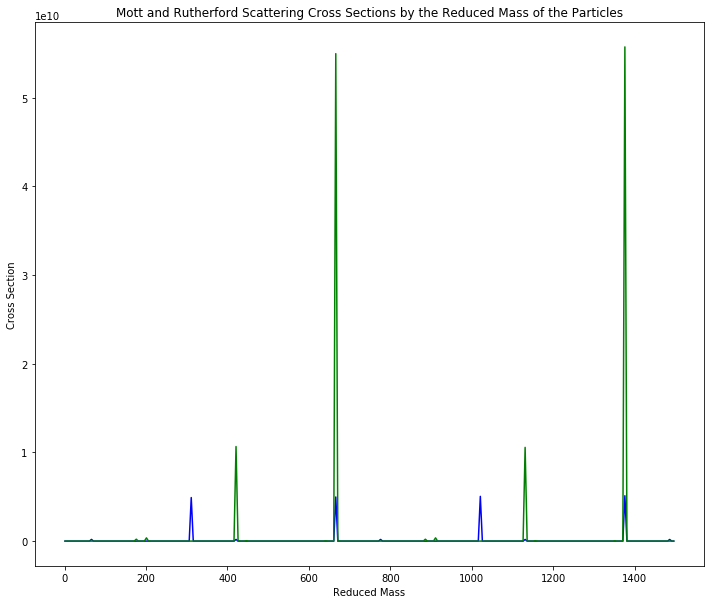

In [7]:
sol = []
nums = []
sol2 = []
s = 1/2
A = 2*(s-0)
X = 1
for i in range(300):
    Mott = (alpha/(4*E))*((mp.csc(X/2))**4+(mp.sec(X/2))**4+(A*math.cos((alpha/(h*v))*math.log(math.tan(X/2)**2)/((mp.sin(X/2)**2)*(mp.cos(X/2)**2)))))**2
    Rutherford = ((alpha/4*E)**2)*(mp.csc(X/2)**4)
    nums.append(X)
    sol2.append(Rutherford)
    sol.append(Mott)
    X+=5
plt.title('Mott and Rutherford Scattering Cross Sections by the Reduced Mass of the Particles') 
plt.ylabel('Cross Section') 
plt.xlabel('Reduced Mass') 
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(nums,sol, color = 'blue')
plt.plot(nums, sol2, color = 'green')

In [8]:
#Fermi gas model formula or the density of states at excitation energy E
E = 1000
ele = input('An element symbol')
def Fermi_gas(E, ele):
    elements = {
        "F": 2.953,
        "Na": 4.335,
        "Mg": 2.734,
        "Al": 2.623
    }
    a = elements.get(ele)
    P_A = (1/(12*(a**(1/4))*(E**(5/4))))*(2.7**(2*math.sqrt(a*E)))
    print(P_A)
Fermi_gas(E, ele)

An element symbolF
8.613344326753523e+41


In [9]:
#back-shafted Fermi gas model formula or the level-density formula
E = 1000
delta = 100
ele = input('An element symbol')
def back_shifted_Fermi_gas(E, ele, delta):
    elements = {
        "F": 2.953,
        "Na": 4.335,
        "Mg": 2.734,
        "Al": 2.623
    }
    a = elements.get(ele)
    P_A = (1/(12*(a**(1/4))*((E-delta)**(5/4))))*(2.7**(2*math.sqrt(a*(E-delta))))
    print(P_A)
back_shifted_Fermi_gas(E, ele, delta)

An element symbolF
3.8596081272848304e+39


In [10]:
#Probability of Scattering
A = 0.000000001    #the area covered by the particle
n = 100000000000    #number of target particles per unit volume
T = 1000    #target thickness
v = 10000    #velocity
t = 10    #time
ang = 45
r = 20    #radial distance
delta_k = 10    #change in wavevector due to scattering
X = m_p    #reduced mass of a and b
E = 1000000    #Energy before reaction
V_r = (-1*alpha)/r    #total interaction potential

diff_cross = (((2*ang)/h**2)*(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*100000000000000000000000000000000000000)-(((math.sin(delta_k*r)/(delta_k*r))*V_r*(r**2)*0))))**2
cross_sect = (diff_cross*(4*math.pi))-(diff_cross*0)
P = cross_sect*n*T
P2 = diff_cross*n*T
print('The probability that scattering will take place is',P)
print('The probability that scattering will take place with a scattering angle of {} is {}'.format(ang, P2))

The probability that scattering will take place is 3.3422976980155644e+224
The probability that scattering will take place with a scattering angle of 45 is 2.6597159996191993e+223


In [11]:
#Finding spin values (classical physics) and de Broglie wavelength
p = 1    #linear momentum
r = 1    #location from a refrence point
l = r*p
de_Broglie = Planck/p
print(l)
print(de_Broglie)

1
6.62607015e-34


In [12]:
wav = 1/2     #Schrodinger wave function
h = Planck/(2*math.pi)
E = 10    #Energy MeV
w = E/h
t = 10    #time (in seconds)
waav = wav*(e**(-1j*w*t))
waav2 = wav*(e**(1j*w*t))
x1 = 3
x2 = 30
P = (waav2*waav*x2)-(waav2*waav*x1)    #Probability the wave packet is between x1 and x2
print('Probability that the wave is between {} and {} is {}'.format(x1, x2, P))
#The total probability to find that particle is 1 which is called the normalization condition

Probability that the wave is between 3 and 30 is (6.75+0j)


One dimentional plus free particle (V0 < E)

In [13]:
#first region
m = 1.5
E = 10    #Energy in MeV
x = 0    #represents direction on the x plane
V0 = 3
I = 20    #particles per second emitted by the source
k = math.sqrt((2*m*E)/(h**2))
k1 = k
k2 = math.sqrt((2*m*(E-V0))/h**2)

B = A*((1-(k2/k1))/(1+(k2/k1)))
A = math.sqrt((m*I)/(h*k))
A1 = A * (e**(1j*((k*x)-(w*t))))
B1 = B * (e**(1j*((k*x)+(w*t))))
wave_funct = A1+B1
print('Wave function is', wave_funct)

Wave function is (1.9453276169726137-1.3011249124716113j)


In [14]:
# reflection coeficient
if B < 0:
    B*-1
if A < 0:
    A*-1
R = (B**2)/(A**2)
print('Reflection coeficient:',R)
# transmission coeficient
C = (2/(1+(k2/k1)))
T = ((4*k2)/k1)/((1+(k2/k1))**2)
print('Transmittion coeficient:',T)

Reflection coeficient: 1.4439986460147445e-21
Transmittion coeficient: 0.992090893685708


In [15]:
wave_length1 = (2*math.pi)/k1
wave_length2 = (2*math.pi)/k2
print('The wavelength the first wave is', wave_length1)
print('The wavelength the first wave is', wave_length2)

The wavelength the first wave is 1.2097493629222134e-34
The wavelength the first wave is 1.4459270486886857e-34


In [16]:
#second region
C = 0
D = C + (A + B)

C1 = C * (2.71828**(k2*x*1j))
D1 = D * (2.71828**(k2*x*-1j))
wave_fun = C1 + D1
print('The wave function is', wave_fun)

The wave function is (2.3403473194096494+0j)


In [17]:
import numpy as np
# transmission coeficient with a barrier
a = 5 * (10**(-40))
T = 1/(1+((0.25)*((V0**2)/(E*(E-V0)))*(math.sinh(k2*a))**2))
print(T)
#In classical mechanics it should be zero but in quantum mechanics it's not.
#This is called quantum tunneling

0.9999999999848264


Infinite well

In [18]:
k = 10
x = 2
wave_fun = A*math.sin(k*x) + B*math.cos(k*x)    #wave function in an infinite well
print(wave_fun)
a = 3
n = (k*a)/math.pi
E_n = (((h**2)*(math.pi**2))/(2*m*(a**2)))*n**2    #energy of the wave/particle
print(E_n)

2.1366089702632745
3.7070723952450615e-67


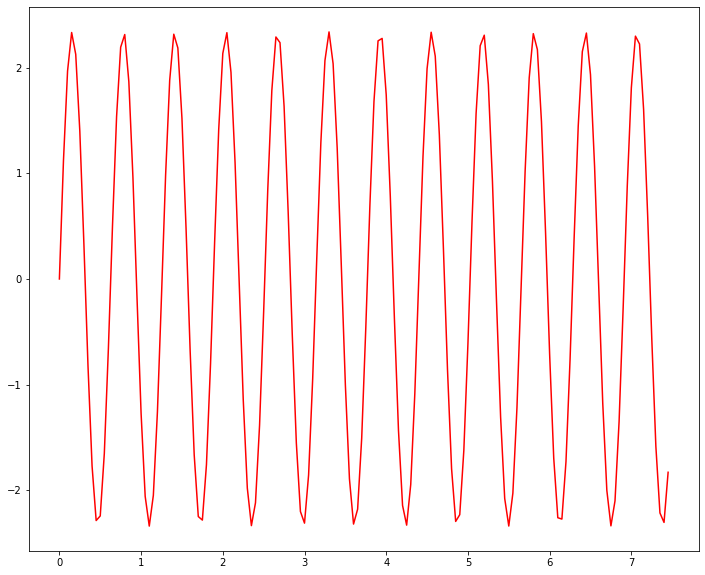

In [19]:
import matplotlib.pyplot as plt

x = 0
a = 6
wav = []
x1 = []
for i in range(150):
    wave_fun = A*math.sin(k*x) + B*math.cos(k*x)
    wav.append(wave_fun)
    x1.append(x)
    x+=0.05
plt.plot(x1, wav, color = 'red')

In [20]:
wav_fun = math.sqrt(2/a)*math.sin((n*math.pi*x)/a)    #wave function on a bound state
print(wav_fun)

-0.11419919021554861


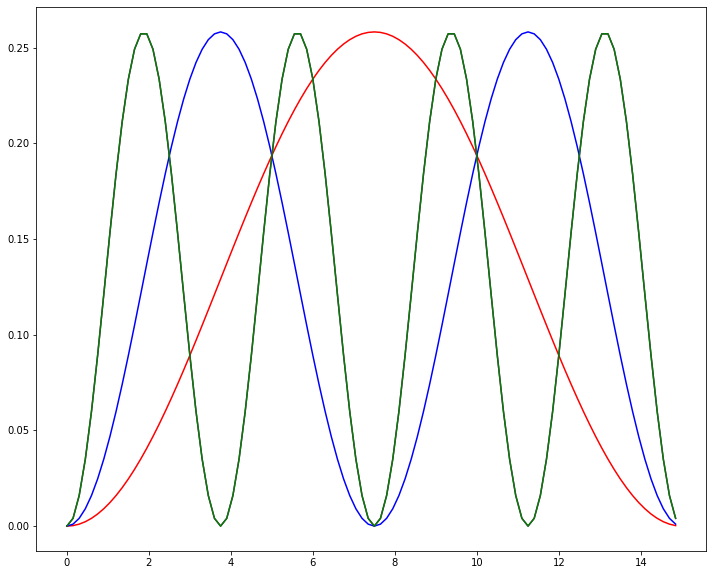

In [21]:
#Ground state
import matplotlib.pyplot as plt

x = 0
a = 30
n = 2
n2 = 4
n3 = 8
n4 = 6
wav = []
wav2 = []
wav3 = []
wav4 = []
x1 = []
for i in range(100):
    wav_fun = math.sqrt(2/a)*math.sin((n*math.pi*x)/a)**2
    wav.append(wav_fun)
    wav_fun = math.sqrt(2/a)*math.sin((n2*math.pi*x)/a)**2
    wav2.append(wav_fun)
    wav_fun = math.sqrt(2/a)*math.sin((n3*math.pi*x)/a)**2
    wav3.append(wav_fun)
    wav_fun = math.sqrt(2/a)*math.sin((n3*math.pi*x)/a)**2
    wav4.append(wav_fun)
    x1.append(x)
    x += 0.15
plt.plot(x1, wav, color = 'red')
plt.plot(x1, wav2, color = 'blue')
plt.plot(x1, wav3, color = 'purple')
plt.plot(x1, wav4, color = 'green')

Finite Potential Well

In [22]:
x = 0
a = 5
V0 = 2
B = 0
F = 0

#region 1 bound state solutions
wav1 = (A * (e**(k1*x))) + (B * (e**(-k1*x)))
#region 2 bound state solutions
wav2 = (C * (e**(1j*k2*x))) + (D * (e**(-1j*k2*x)))
print(wav1)
print(wav2)

2.340347319320716
(2.3403473194096494+0j)


In [23]:
alpha = (k2*a)/2
P = math.sqrt((m*V0*(a**2))/(2*(h**2)))
atana = ((P**2)-(alpha**2))**0.5
print(atana)

(5.621993422731693e+18+9.181412022872136e+34j)


Making a harmonic oscilator

In [24]:
#potential energy in a simple harmonic oscilator
k = math.sqrt((2*m*E)/(h**2))
x = 5*(10**-20)
V = (0.5)*k*(x**2)
print(V)

6.492238702240584e-05


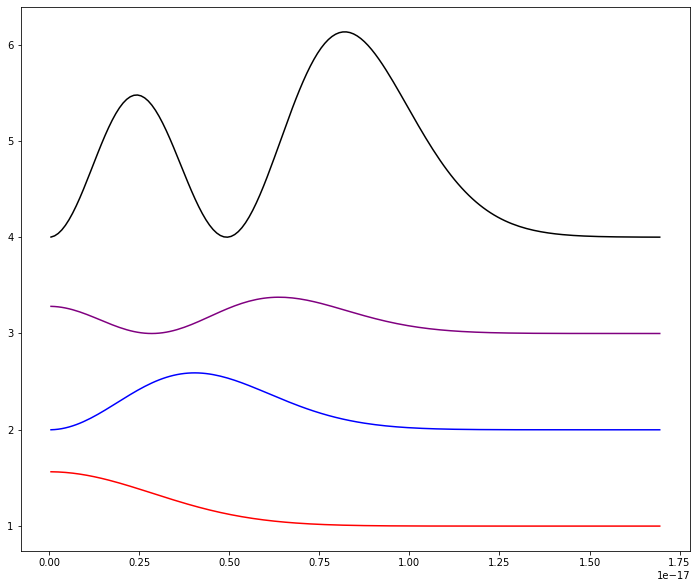

In [25]:
m = 1*(10**(-22))
wav = []
wav2 = []
wav3 = []
wav4 = []
x1 = []
x = 5*(10**(-20))
k = math.sqrt((2*m*E)/(h**2))
alpha2 = math.sqrt(k*m)/h
alpha = math.sqrt(alpha2)
for i in range(170):
    wave_fun = ((math.pi**(-0.25))*(2.7**((-alpha2*(x**2))/2)))**2
    wav.append(wave_fun+1)
    wave_fun = ((2**(-0.25))*(math.pi**(-0.25))*(2*alpha*x)*(2.7**((-alpha2*(x**2))/2)))**2
    wav2.append(wave_fun+2)
    wave_fun = ((2**(-3/2))*(math.pi**(-0.25))*((4*alpha2*(x**2))-2)*(2.7**((-alpha2*(x**2))/2)))**2
    wav3.append(wave_fun+3)
    wave_fun = ((2**(-3/2))*(math.pi**(-0.25))*((8*(alpha**3)*(x**3))-(12*alpha*x))*(2.7**((-alpha2*(x**2))/2)))**2
    wav4.append(wave_fun+4)
    x1.append(x)
    x+=1*(10**-19)
plt.plot(x1, wav, color = 'red')
plt.plot(x1, wav2, color = 'blue')
plt.plot(x1, wav3, color = 'purple')
plt.plot(x1, wav4, color = 'black')